# Predicting galaxy redshift from band magnitudes with random forest

Zooey Nguyen

2021-07-08

- 2021-07-16: Update with photoz_metrics and v3 crossmatched data

- 2021-07-20: Update with new photoz_metrics metrics outputs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_metrics import *
from photoz_utils import *

## Setup data

In [2]:
df = import_photoz_data('/data/HSC/HSC_v3/trimmed_forced_forced2_spec_z_matched_online.csv')
df = clean_photoz_data(df)
X_train, X_test, y_train, y_test = split_photoz_data(df)
df

,g_mag,r_mag,i_mag,z_mag,y_mag,zspec
1,21.735455,21.091333,20.344463,20.022955,19.956047,2.18990
2,21.779919,21.001816,20.700275,20.562370,20.465494,0.05522
3,22.846054,21.378252,19.988840,19.455887,19.151213,0.77590
4,22.864800,21.190277,20.361565,19.964561,19.708752,0.44150
5,21.878937,21.425276,21.239027,21.169462,21.168419,0.18440
...,...,...,...,...,...,...
129896,23.842861,23.231312,22.365879,22.095644,22.092629,0.85800
129897,23.074793,22.254620,21.639031,21.444776,21.341650,0.66670
129898,23.593109,22.241854,21.101269,20.645126,20.344555,0.54340
129899,23.615334,22.248329,21.106613,20.645607,20.348583,0.54340


## Train random forest regression

In [3]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 200)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

## Evaluate training point estimates

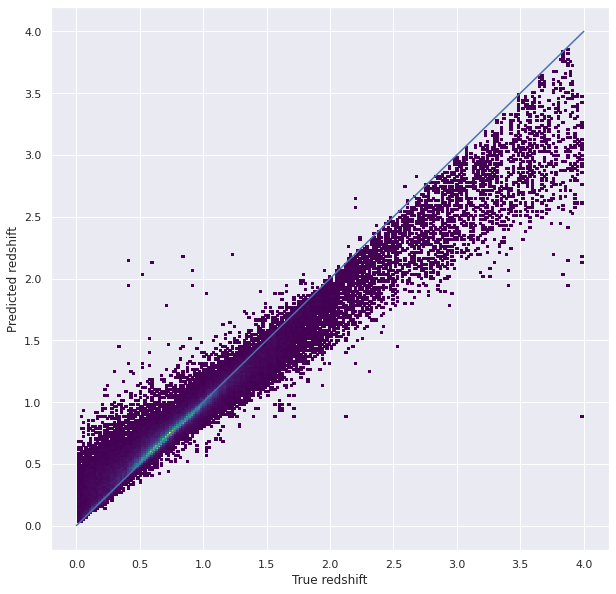

In [4]:
y_train_pred = rf_model.predict(X_train)
y_train_pred = pd.Series(y_train_pred, index=y_train.index)
plot_predictions(y_train_pred, y_train)

In [5]:
metrics_agg = get_point_metrics(y_train_pred, y_train)
metrics_binned = get_point_metrics(y_train_pred, y_train, binned=True)
metrics_binned

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",4647,0.309794,0.074623,0.063826,0.120272,0.092442,0.097482,0.336131
1,"(0.2, 0.4]",7322,0.229531,0.058250,0.053403,0.076615,0.070421,0.097787,0.189975
2,"(0.4, 0.6]",18858,0.080533,0.017662,0.017359,0.027865,0.023910,0.137130,0.037597
3,"(0.6, 0.8]",24658,0.035522,0.006277,0.006103,0.018280,0.014659,0.130343,0.008233
4,"(0.8, 1.0]",19266,0.024808,-0.001056,-0.000856,0.016169,0.012864,0.130385,0.003789
5,"(1.0, 1.2]",9550,0.038781,-0.009512,-0.008400,0.023861,0.018629,0.114136,0.003246
6,"(1.2, 1.4]",4159,0.077107,-0.023646,-0.021972,0.036631,0.031430,0.078625,0.003126
7,"(1.4, 1.6]",2631,0.124399,-0.042534,-0.039760,0.044179,0.044444,0.047891,0.010262
8,"(1.6, 1.8]",1680,0.150923,-0.048830,-0.046676,0.048186,0.048706,0.057738,0.044643
9,"(1.8, 2.0]",1164,0.175114,-0.057746,-0.052248,0.050226,0.051188,0.048110,0.062715


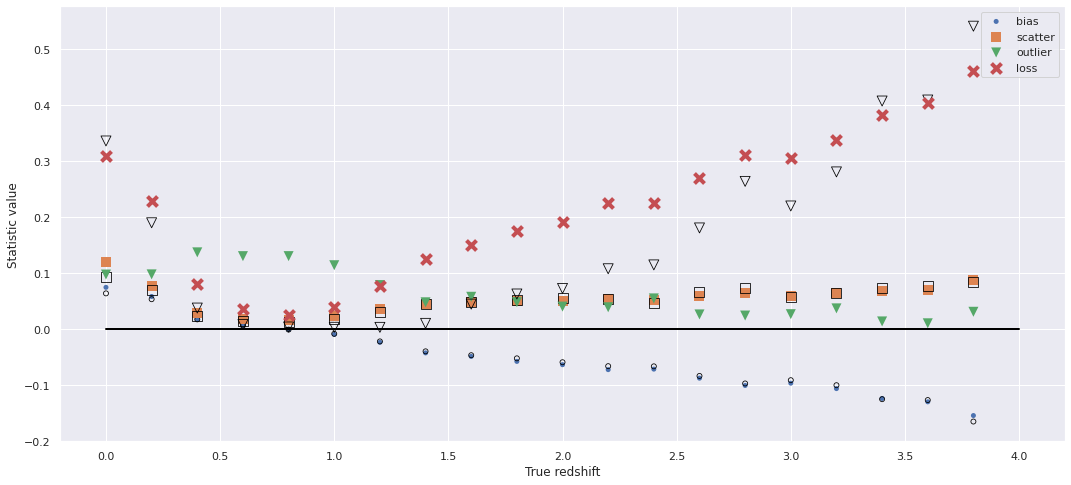

In [6]:
plot_point_metrics(metrics_binned)

## Evaluate training density estimates

In [7]:
predictions = []
for i in range (len(rf_model.estimators_)):
    predictions.append(np.array(rf_model.estimators_[i].predict(X_train)))    
y_train_densities = np.asarray(predictions).T

In [ ]:
density_metrics = get_density_metrics(y_train_densities, y_train)

In [9]:
plot_density_metrics(density_metrics)

NameError: name 'density_metrics' is not defined

## Evaluate test point estimates

In [ ]:
y_test_pred = rf_model.predict(X_test)
y_test_pred = pd.Series(y_test_pred, index=y_test.index)
plot_predictions(y_test_pred, y_test)

In [ ]:
metrics_agg = get_point_metrics(y_test_pred, y_test)
metrics_binned = get_point_metrics(y_test_pred, y_test, binned=True)
metrics_binned

In [ ]:
plot_point_metrics(metrics_binned)

## Evaluate test density estimates

In [ ]:
predictions = []
for i in range (len(rf_model.estimators_)):
    predictions.append(np.array(rf_model.estimators_[i].predict(X_test)))    
y_test_densities = np.asarray(predictions).T

In [ ]:
density_metrics = get_density_metrics(y_test_densities, y_test)

In [ ]:
PIT = density_metrics['PIT']
CRPS = density_metrics['CRPS']

In [ ]:
plot_density_metrics(density_metrics)